In [1]:
# import the necessary packages

%matplotlib inline
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
 
# def midpoint(ptA, ptB):
# 	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [2]:
image=cv2.imread("p112.jpg")
#cv2.imshow("image",image)
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [3]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

(array([409800.,   3840.,   1692.,   6905.,   5907.,   1867.,   1749.,
          1952.,    986.,   7670.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <a list of 10 Patch objects>)

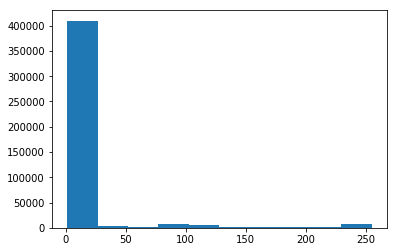

In [4]:
plt.hist(gray.flatten())


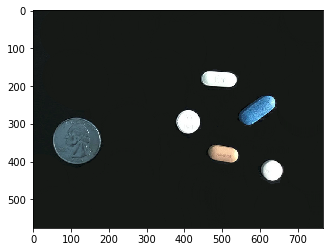

In [5]:
plt.imshow(image)

In [6]:
g = cv2.GaussianBlur(gray,(7,7),0) #blur the edges(light blur)

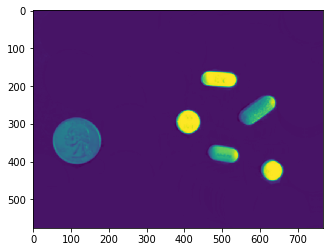

In [7]:
plt.imshow(g)

In [8]:
edged = cv2.Canny(gray,20,400) #edge detection

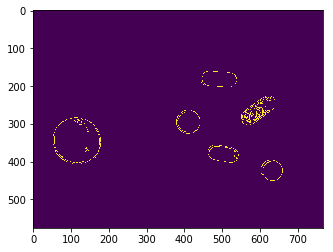

In [9]:
plt.imshow(edged)

In [10]:
edged = cv2.dilate(edged, None ,iterations=1) #increases the object area

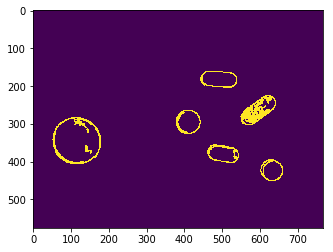

In [11]:
plt.imshow(edged)

In [12]:
edged = cv2.erode(edged,None,iterations=1)    #used to diminish the feature of an image because uit erodes away the edges of the image 

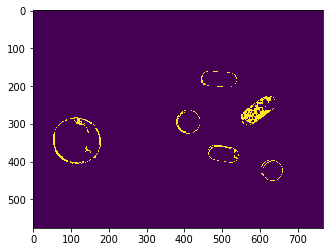

In [13]:
plt.imshow(edged)

6 6


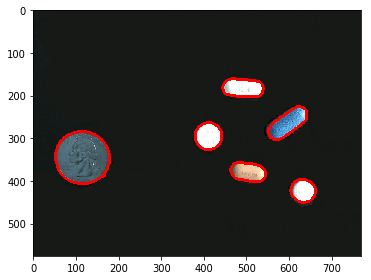

In [14]:
# to find contours
import cv2
import numpy as np
import skimage.io as ski
img1 = cv2.imread('p112.jpg',1)
#img = cv2.imread('p111.jpg',0)

# ret,thl = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
# print(thl.shape)
# ski.imshow(thl)
#edges = cv2.Canny(img, 100, 255)
##cv2
#ski.imshow(edges)
_,cnts, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img1,cnts, -1, (255,0,0), 5)
C = len(cnts)
H = len(hierarchy[0])
print (C,H)
ski.imshow(img1)
# # points = [0]*(C)
# # i = 0
# # while i < C:
# #     cnt = contours[i]
# #     M = cv2.moments(cnt)
# #     if M['m00']>0:
# #         cx = int(M['m10']/M['m00'])
# #         cy = int(M['m01']/M['m00'])

# #     else:
# #         cx = cy = 0
# #     points[i] = (cx,cy)   
# #     i = i+1
# # print (points)



In [15]:
# import cv2
# import numpy as np
# import skimage.io as ski
# img = cv2.imread('12.jpg',0)
# img1 = cv2.imread('12.jpg',1)
# ret,thl = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
# print(thl.shape)
# ski.imshow(thl)
# #edges = cv2.Canny(img, 100, 255)
# ##cv2
# #ski.imshow(edges)
# _,contours, hierarchy = cv2.findContours(thl, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(img1,contours, -1, (255,0,0), 3)
# C = len(contours)
# H = len(hierarchy[0])
# print (C,H)
# ski.imshow(img1)
# # points = [0]*(C)
# # i = 0
# # while i < C:
# #     cnt = contours[i]
# #     M = cv2.moments(cnt)
# #     if M['m00']>0:
# #         cx = int(M['m10']/M['m00'])
# #         cy = int(M['m01']/M['m00'])

# #     else:
# #         cx = cy = 0
# #     points[i] = (cx,cy)   
# #     i = i+1
# # print (points)


In [16]:
print("-----Number of shapes----> {0}".format(len(cnts)))
hierarchy

-----Number of shapes----> 6


array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [-1,  4, -1, -1]]], dtype=int32)

In [17]:
#sorting contours
cnts   

[array([[[624, 396]],
 
        [[623, 397]],
 
        [[621, 397]],
 
        [[620, 398]],
 
        [[618, 398]],
 
        [[617, 399]],
 
        [[616, 399]],
 
        [[613, 402]],
 
        [[612, 402]],
 
        [[610, 404]],
 
        [[610, 405]],
 
        [[607, 408]],
 
        [[607, 409]],
 
        [[606, 410]],
 
        [[606, 411]],
 
        [[605, 412]],
 
        [[605, 414]],
 
        [[604, 415]],
 
        [[604, 419]],
 
        [[603, 420]],
 
        [[603, 425]],
 
        [[604, 426]],
 
        [[604, 429]],
 
        [[605, 430]],
 
        [[605, 432]],
 
        [[606, 433]],
 
        [[606, 434]],
 
        [[609, 437]],
 
        [[610, 437]],
 
        [[612, 439]],
 
        [[612, 440]],
 
        [[617, 445]],
 
        [[618, 445]],
 
        [[620, 447]],
 
        [[621, 447]],
 
        [[622, 448]],
 
        [[623, 448]],
 
        [[624, 449]],
 
        [[627, 449]],
 
        [[628, 450]],
 
        [[639, 450]],
 
        [[640, 4

In [26]:
#sort contours form left-to-right
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)



In [27]:
cnts,boundingBoxes=sort_contours(cnts,method="left-to-right")
cnts

(array([[[109, 284]],
 
        [[108, 285]],
 
        [[102, 285]],
 
        [[101, 286]],
 
        [[ 97, 286]],
 
        [[ 96, 287]],
 
        [[ 94, 287]],
 
        [[ 93, 288]],
 
        [[ 91, 288]],
 
        [[ 90, 289]],
 
        [[ 88, 289]],
 
        [[ 87, 290]],
 
        [[ 86, 290]],
 
        [[ 85, 291]],
 
        [[ 84, 291]],
 
        [[ 83, 292]],
 
        [[ 82, 292]],
 
        [[ 81, 293]],
 
        [[ 80, 293]],
 
        [[ 79, 294]],
 
        [[ 78, 294]],
 
        [[ 74, 298]],
 
        [[ 73, 298]],
 
        [[ 66, 305]],
 
        [[ 66, 306]],
 
        [[ 64, 308]],
 
        [[ 62, 308]],
 
        [[ 62, 311]],
 
        [[ 61, 312]],
 
        [[ 61, 313]],
 
        [[ 59, 315]],
 
        [[ 59, 316]],
 
        [[ 58, 317]],
 
        [[ 58, 319]],
 
        [[ 57, 320]],
 
        [[ 57, 321]],
 
        [[ 56, 322]],
 
        [[ 56, 325]],
 
        [[ 55, 326]],
 
        [[ 55, 327]],
 
        [[ 54, 328]],
 
        [[ 54, 3

HEIGHT AND BREADTH FOR (0th) object: 0.9176953125 0.955
CO-ordinates of the box:  52 284 128 123

HEIGHT AND BREADTH FOR (1th) object: 0.4700390625 0.4700390625
CO-ordinates of the box:  380 264 63 63

HEIGHT AND BREADTH FOR (2th) object: 0.3208203125 0.71625
CO-ordinates of the box:  444 161 96 43

HEIGHT AND BREADTH FOR (3th) object: 0.3506640625 0.611796875
CO-ordinates of the box:  463 356 82 47

HEIGHT AND BREADTH FOR (4th) object: 0.581953125 0.68640625
CO-ordinates of the box:  550 226 92 78

HEIGHT AND BREADTH FOR (5th) object: 0.4103515625 0.432734375
CO-ordinates of the box:  603 396 58 55

--------THAT'S IT :X---------


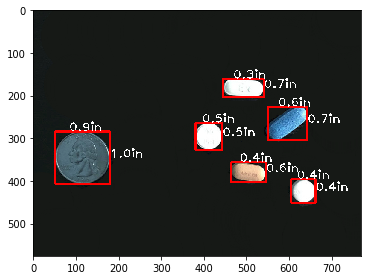

In [28]:
#draw rectangle, find distances, put text
import math
(x,y,w,h) = cv2.boundingRect(cnts[0])
ppm = w/0.955

frame=cv2.imread("p112.jpg",1)
for i in range(len(cnts)):
    (x,y,w,h) = cv2.boundingRect(cnts[i])   
    cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 0, 0), 3)
    
    ht = dist.euclidean((x, y), (x, y+h))
    breadth = dist.euclidean((x, y+h), (x+w, y+h))
    
    ht=ht/ppm    
    breadth = breadth/ppm
    
    font                   = cv2.FONT_HERSHEY_PLAIN
    bottomLeftCornerOfText = (x,y)
    fontScale              = 2
    fontColor              = (255,255,255)
    lineType               = 2

    cv2.putText(frame,"{:.1f}in".format(ht),(x+w-math.ceil(w/2+w/4),y),font,fontScale,fontColor,lineType)
    cv2.putText(frame,"{:.1f}in".format(breadth),(x+w,y+h-math.floor(h/2)),font,fontScale,fontColor,lineType)    
    
    print("HEIGHT AND BREADTH FOR (%dth) object:"%i,end=" ")
    print(ht,breadth)
    print("CO-ordinates of the box: ",x,y,w,h,end="\n\n")
    ski.imshow(frame)
    
print("--------THAT'S IT :X---------")

In [25]:
# pixelsPerMetric = None
# for c in cnts:
#     #print(c)
#     if cv2.contourArea(c) < 100:
#         continue
#     orig = image.copy()
#     box = cv2.minAreaRect(c)
#     box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
#     box = np.array(box, dtype="int")
 
    
#     # order the points in the contour such that they appear
#     # in top-left, top-right, bottom-right, and bottom-left
#     # order, then draw the outline of the rotated bounding
#     # box
#     box = perspective.order_points(box)
#     cv2.drawContours(orig, [box.astype("int64")], -1, (0, 255, 0), 2)
#     print(box)
#     # loop over the original points and draw them
#     for (x, y) in box:
#         cv2.circle(orig, (int(x), int(y)), 3, (0, 0, 255), -1)
#         # unpack the ordered bounding box, then compute the midpoint
#         # between the top-left and top-right coordinates, followed by
#         # the midpoint between bottom-left and bottom-right coordinates
#         (tl, tr, br, bl) = box
#         (tltrX, tltrY) = midpoint(tl, tr)
#         (blbrX, blbrY) = midpoint(bl, br)

#         # compute the midpoint between the top-left and top-right points,
#         # followed by the midpoint between the top-righ and bottom-right
#         (tlblX, tlblY) = midpoint(tl, bl)
#         (trbrX, trbrY) = midpoint(tr, br)

#         # draw the midpoints on the image
#         cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
#         cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
#         cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
#         cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)

#         # draw lines between the midpoints
#         cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
#             (255, 0, 255), 2)
#         cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
#             (255, 0, 255), 2)
    